In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import os

In [3]:
IMG_SIZE = (224, 224)  # Suitable for VGG16 & ResNet50
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
train_dir = r'D:\back up-Main project\Kidney-Stone-Normal-images\dataset\train'
val_dir = r'D:\back up-Main project\Kidney-Stone-Normal-images\dataset\val'
test_dir = r'D:\back up-Main project\Kidney-Stone-Normal-images\dataset\test'

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize pixel values
    rotation_range=20,       # Random rotation
    width_shift_range=0.2,   # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Random zoom
    horizontal_flip=True,    # Flip images
    fill_mode='nearest'      # Fill strategy
)

val_test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='binary', shuffle=False
)

Found 1782 images belonging to 3 classes.
Found 714 images belonging to 3 classes.
Found 358 images belonging to 3 classes.


In [9]:
def build_model(base_model):
    base_model.trainable = False  # Freeze the base model

    x = Flatten()(base_model.output)  # Flatten feature maps
    x = Dense(256, activation='relu')(x)  # Fully connected layer
    x = Dropout(0.3)(x)  # Dropout for regularization
    output_layer = Dense(1, activation='sigmoid')(x)  # ✅ Correctly connected to x

    model = Model(inputs=base_model.input, outputs=output_layer)  # ✅ Now it's correct
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [10]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

vgg16_model = build_model(vgg16_base)
resnet50_model = build_model(resnet50_base)

In [11]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')
]

In [12]:
print("\nTraining VGG16 Model...\n")
vgg16_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)


Training VGG16 Model...



C:\Users\sarav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6067 - loss: 2.1221

56/56 ━━━━━━━━━━━━━━━━━━━━ 286s 5s/step - accuracy: 0.6085 - loss: 2.1037 - val_accuracy: 0.8950 - val_loss: 0.2811 - learning_rate: 0.0010
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8471 - loss: 0.3205

56/56 ━━━━━━━━━━━━━━━━━━━━ 319s 6s/step - accuracy: 0.8477 - loss: 0.3198 - val_accuracy: 0.9706 - val_loss: 0.1529 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9154 - loss: 0.2083

56/56 ━━━━━━━━━━━━━━━━━━━━ 318s 6s/step - accuracy: 0.9155 - loss: 0.2082 - val_accuracy: 0.9720 - val_loss: 0.1102 - learning_rate: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9415 - loss: 0.1733

56/56 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.9414 - loss: 0.1733 - val_accuracy: 0.9804 - val_loss: 0.0766 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 322s 6s/step - accuracy: 0.9588 - loss: 0.1360 - val_accuracy: 0.9804 - val_loss: 0.0630 - learning_rate: 0.0010
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9656 - loss: 0.1077

56/56 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.9656 - loss: 0.1077 - val_accuracy: 0.9944 - val_loss: 0.0439 - learning_rate: 0.0010
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9762 - loss: 0.0822

56/56 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.9761 - loss: 0.0822 - val_accuracy: 0.9972 - val_loss: 0.0370 - learning_rate: 0.0010
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 317s 6s/step - accuracy: 0.9811 - loss: 0.0732 - val_accuracy: 0.9972 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.9719 - loss: 0.0787 - val_accuracy: 0.9958 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 10/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 316s 6s/step - accuracy: 0.9837 - loss: 0.0612 - val_accuracy: 0.9902 - val_loss: 0.0296 - learning_rate: 0.0010


In [ ]:
print("\nTraining ResNet50 Model...\n")
resnet50_model.fit(    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator,
    callbacks=callbacks
)


Training ResNet50 Model...

Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 174s 3s/step - accuracy: 0.5656 - loss: 4.9883 - val_accuracy: 0.7283 - val_loss: 0.5465 - learning_rate: 0.0010
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.6761 - loss: 0.6118 - val_accuracy: 0.7409 - val_loss: 0.5622 - learning_rate: 0.0010
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 164s 3s/step - accuracy: 0.6786 - loss: 0.6014 - val_accuracy: 0.7801 - val_loss: 0.4518 - learning_rate: 0.0010
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.7373 - loss: 0.5145 - val_accuracy: 0.8025 - val_loss: 0.4323 - learning_rate: 0.0010
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.7301 - loss: 0.4830 - val_accuracy: 0.8011 - val_loss: 0.4539 - learning_rate: 0.0010
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.7576 - loss: 0.4675 - val_accuracy: 0.7843 - val_loss: 0.4456 - learning_rate: 0.0010
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.

In [18]:
model.save('detect_kidney_stone.keras')


--- VGG16 Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-Score: 1.00


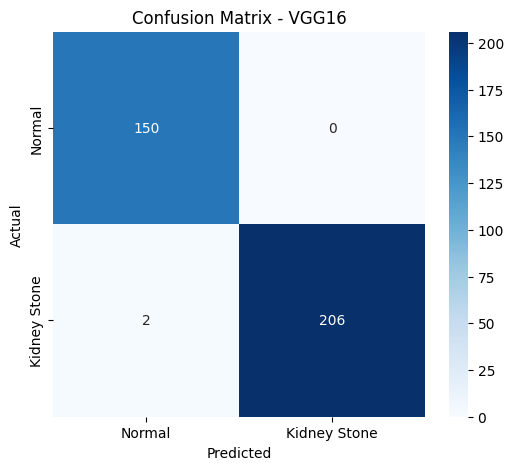

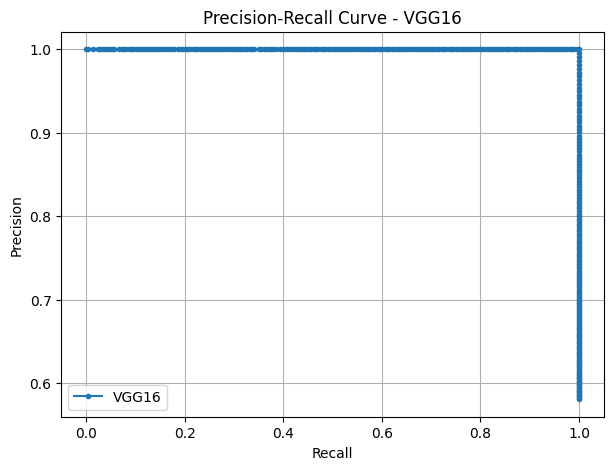


--- ResNet50 Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step
Accuracy: 0.83
Precision: 0.87
Recall: 0.83
F1-Score: 0.85


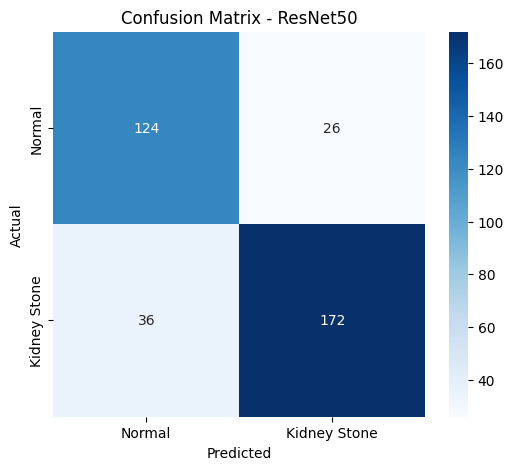

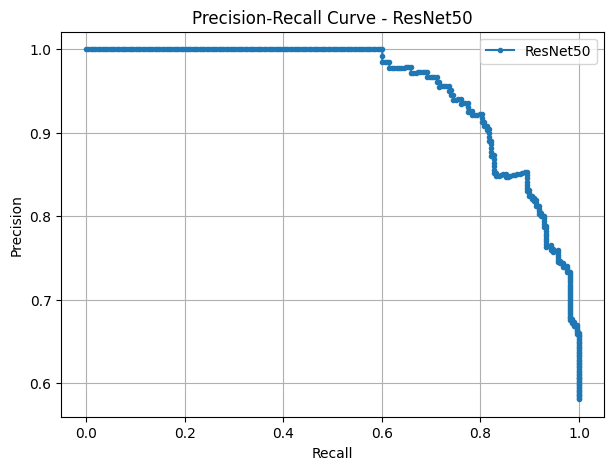

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, auc

# ✅ Function to Evaluate the Model
def evaluate_model(model, test_generator, model_name="Model"):
    print(f"\n--- {model_name} Evaluation ---")
    
    # Get predictions
    y_pred_probs = model.predict(test_generator)  # Probabilities
    y_pred = (y_pred_probs > 0.5).astype(int)     # Convert to 0/1
    y_true = test_generator.classes               # Actual labels

    # Compute Metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print Scores
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

    # ✅ Confusion Matrix Plot
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Normal', 'Kidney Stone']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ✅ Precision-Recall Curve
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_probs)
    plt.figure(figsize=(7, 5))
    plt.plot(recall_vals, precision_vals, marker='.', label=f'{model_name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

   

    return accuracy, precision, recall, f1

# ✅ Evaluate VGG16 Model
vgg16_metrics = evaluate_model(vgg16_model, test_generator, model_name="VGG16")

# ✅ Evaluate ResNet50 Model
resnet50_metrics = evaluate_model(resnet50_model, test_generator, model_name="ResNet50")

